### Week 04 Lab: Simple Linear Regression

In this lab, we will learn how to develop a simple linear regression model from scratch. After which we will verify our results using the common package from sklearn. By the end of this lab, you should be able to:
*   implement the simple linear regression algorithm in python
*   use your own algorithm to create a simple linear regression model from data
*   use the library from sklearn to create a simple linear regression model from data


### Section 1.0 Importation of libraries

We will import some of the typical python libraries.

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Section 1.1 Create the data points

For this lab, we will be generating the dataset randomly. These numbers are represented generally by the formula.

$y = 2 * x + rand(-18,27)$

A random number in between -18 to 27 will be added to the formula (2 * x) to provide some randomization to the $y$ values. Do note that although the numbers are randomly generated, all of us should have the same set of numbers. (why?)

In this section we will be generating just 50 points. For the time being, we will ignore the need for training data, testing data etc and just use all 50 points as training data. The main point of the Lab is really to understand the linear regression algorithm.

In [ ]:
random.seed(5)

num_points = 50
X_data = np.array(random.sample(range(1, 100), num_points))
y_data = X_data * 2 + np.array([random.randint(-18, 27) for x in range(num_points)])

print(len(X_data))
print(len(y_data))

50
50


Lets do a quick plot of the points to visually see how they look like.

Plot a scatter plot between X_data and y_data.

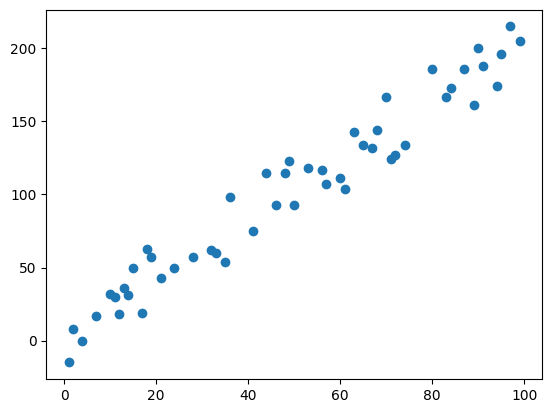

Convert the points to a dataframe and do a quick view of the first few rows. Name the columns "x", for X_data and "y" for y_data.

Check the first five rows of the dataframe.

,x,y
0,80,186
1,33,60
2,95,196
3,46,93
4,89,161


#### Section 1.2 Calculation of MSE

Lets use the error metric, mean square error and implement the loss function here. We use the mean square error here because the maths will be much easier.

The error function (mean squre error) is

$E = \frac{1}{n}  \sum\limits_{i=0}^{n} (y_i - \hat{y}_i)^2$

where $\hat{y}_i$ is the predicted value of $y$ at point $i$. We can write this as:

$E = \frac{1}{n}  \sum\limits_{i=0}^{n} (y_i - (m * x_i + c) )^2$

From the formulas above, define a method known as mse (mean square error). It should take parameters, m, c and the dataframe df. It should return the loss, or the mse.

#### Section 1.3 Calculation of Gradient Descent

Recall that in the lectures, the rules that we wish to learn are the values of $m$ and $c$. In this context, we will have to tweak the values of $m$ and $c$. However we can only change these values by finding out the gradient which increases the error $E$ the most, and then by going against it to reduce the error.

Mathematically, we will need to calculate the partial derivatives of $E$ with respect to $m$, and $E$ with respect to $c$. After we calculate these partial derivatives, we will reduce the values of $m$ and $c$ by these partial derivatives multiplied by a learning rate $L$.

This learning rate $L$ is defined as how fast we wish the rules to learn.

Let's calculate the partial derivatives here. $\frac{\partial E}{\partial m}$ is calculated here:

$\frac{\partial E}{\partial m} = \frac{1}{n} \sum\limits_{i=0}^{n} 2 * (y_i - (m * x_i + c) ) * (- x_i) $

$\frac{\partial E}{\partial m} = -2 * \frac{1}{n} \sum\limits_{i=0}^{n} x_i * (y_i - (m * x_i + c))$

$\frac{\partial E}{\partial c}$ is calculated here:

$\frac{\partial E}{\partial c} = \frac{1}{n} \sum\limits_{i=0}^{n} 2 * (y_i - (m * x_i + c) ) * (-1) $

$\frac{\partial E}{\partial c} = -2 * \frac{1}{n} \sum\limits_{i=0}^{n} (y_i - (m * x_i + c))$

Here we are going to write the gradient descent function. It would take the form of the following:



```
def gradient_descent(m_curr, c_curr, df, L):
  m_gradient = 0
  c_gradient = 0

  n = len(df)

  for i in range(n):
    # get the current x value of the dataframe.
    # get the current y value of the dataframe.
    x = # todo
    y = # todo

    # calculate the gradient based on the formula above.
    m_gradient += # todo
    c_gradient += # todo

  # update m and c based on the gradient above and the learning rate.
  m = # todo
  c = # todo

  return m, c
  ```




#### Section 1.4 Testing our implementation


Normalize the dataframe to have the values placed between 0 and 1.

In [ ]:
normalized_df=(df-df.min())/(df.max()-df.min())

# You can uncomment the following line if you wish to see the coefficients converge to something more interpretable. However you would need to use a much smaller learning rate, like 0.0001
# normalized_df = df

Set the gradient m to 0, c to 0, L to 0.01 and epochs to 1000.

Write a for loop to run gradient descent by the number of epochs.

Epoch:0 0.32994971644612475
Epoch:50 0.05850663892713799
Epoch:100 0.03333092253306617
Epoch:150 0.027883852250483447
Epoch:200 0.02444964910165814
Epoch:250 0.02158365273652946
Epoch:300 0.019117122398739188
Epoch:350 0.01698836053547054
Epoch:400 0.01515064269125556
Epoch:450 0.013564140745556284
Epoch:500 0.012194510651009335
Epoch:550 0.011012106208772363
Epoch:600 0.009991334035122831
Epoch:650 0.009110099328225024
Epoch:700 0.008349327601883953
Epoch:750 0.007692551813235509
Epoch:800 0.0071255559304759745
Epoch:850 0.006636067224249645
Epoch:900 0.006213490622181534
Epoch:950 0.00584867937660224
0.7111130819656366 0.16492308923920096


Plot the scatter plot of x and y points, as well as the regression line.

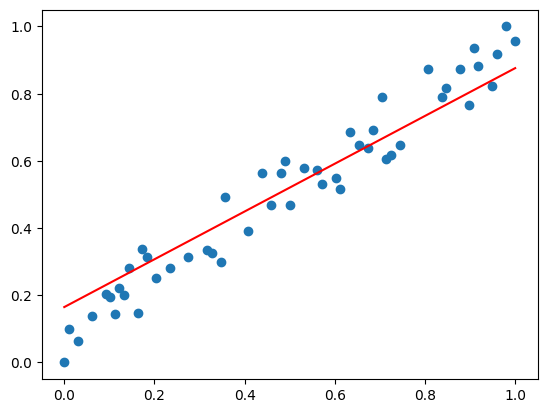

In [ ]:
plt.scatter(normalized_df.x, normalized_df.y)
plt.plot(list(np.arange(0, 1.1,0.1)), [m * x + c for x in np.arange(0, 1.1,0.1)], color="red")

#### Section 1.5 Plotting the loss.


Calculate the mse per epoch save it as a list tuple. Thereafter plot out the loss with the y axis as the loss and x axis as the iteration.

In [ ]:
m = 0
c = 0
L = 0.01
epochs = 1000

temp = []
for i in range(epochs):
  temp.append((i, mse(m, c, normalized_df)))
  m, c = gradient_descent(m, c, normalized_df, L)

0.7111130819656366 0.16492308923920096
[(0, 0.32994971644612475), (1, 0.31546535919699054), (2, 0.30169676280843816), (3, 0.28860831675471854), (4, 0.27616618291531014), (5, 0.2643382073567718), (6, 0.2530938365054926), (7, 0.2424040374927944), (8, 0.23224122246471127), (9, 0.22257917665911356), (10, 0.21339299006266343), (11, 0.20465899246942162), (12, 0.19635469177179488), (13, 0.1884587153229399), (14, 0.180950754217748), (15, 0.17381151034714237), (16, 0.16702264608765327), (17, 0.16056673649510134), (18, 0.15442722387775695), (19, 0.1485883746305356), (20, 0.14303523821769457), (21, 0.1377536081970916), (22, 0.13272998518439003), (23, 0.12795154166065384), (24, 0.12340608853158087), (25, 0.1190820433511899), (26, 0.11496840012711539), (27, 0.11105470062878982), (28, 0.10733100712370874), (29, 0.1037878764706987), (30, 0.10041633550264628), (31, 0.09720785763450626), (32, 0.0941543406356045), (33, 0.09124808550828384), (34, 0.08848177641782647), (35, 0.08584846162132888), (36, 0.08

Plot out the loss through a scatter plot.

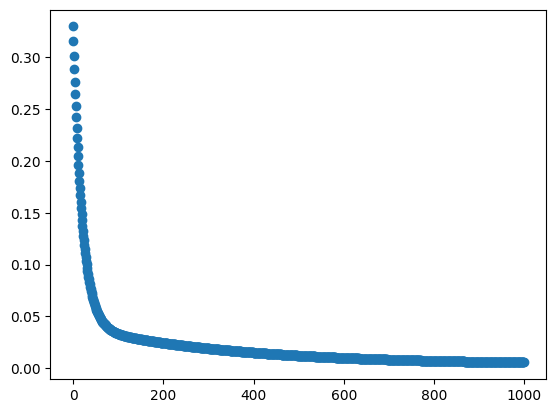

In [ ]:
plt.scatter(*zip(*temp))

### Section 1.6 Extending to Multiple Linear Regression

In the sections above, the work was relatively simple as it was a simple linear regression. We will extend it to multiple linear regression in the following section. The main task is to carry out proper vectorization of the variables.

Let's just try to vectorize the function properly. Let's look again at the function for gradient descent:

```
def gradient_descent(m_curr, c_curr, df, L):
  m_gradient = 0
  c_gradient = 0

  n = len(df)

  for i in range(n):
    x = df.iloc[i].x
    y = df.iloc[i].y

    m_gradient += - (2/n) * x * (y - (m_curr * x + c_curr))
    c_gradient += - (2/n) * (y - (m_curr * x + c_curr))

  m = m_curr - m_gradient * L
  c = c_curr - c_gradient * L

  return m, c
```

There seems to be only two portions which require you do carry out any vectorization. They are in the for loop

```
  for i in range(n):
    x = df.iloc[i].x
    y = df.iloc[i].y
```

and the lines:

```
    m_gradient += - (2/n) * x * (y - (m_curr * x + c_curr))
    c_gradient += - (2/n) * (y - (m_curr * x + c_curr))
```







Such items are always very tricky to vectorize. I find that one of the easier ways is to determine the sizes of the matrix and then use these sizes to "work backwards". However if you know of an easier way do let me know! Let's assume the following matrix sizes:
*   $c$: 1x1 vector.
*   $m$: fx1 matrix, where $f$ is the number of features (independent variables)
*   $x$: n x f matrix, where $f$ is the number of features (independent variables)
*   $y$: n x 1 vector.

Let's look at the first term,

$(y - (x * m_{curr} + c_{curr}))$

This nicely reduces to

loss = $(y - (x.dot(m_{curr}) + c_{curr}))$

Which the output is also n x 1


Let's look at the second term as it is easier.

```
    c_gradient += - (2/n) * (y - (m_curr * x + c_curr))

    # which reduces to:

    c_gradient += - (2/n) * (loss))

```

c_gradient is of size 1 x 1 while the output (loss) is n x 1. Hence all we need to do is to sum up all the values to get a 1x1 matrix. We can hence remove the $for$ loop to get just

```
    c_gradient = - (1/n) * np.sum(loss)
```



Now let's look at the first term:

```
    m_gradient += - (2/n) * x * (y - (m_curr * x + c_curr))

    # which reduces to:

    m_gradient += - (2/n) * x * (loss)

```

$x$: n x f sample while loss is n x 1. For the math to work out, we need to carry out a transpose of $x$ so that we get a f x n matrix dot product a n x 1 matrix. This gives us a f x 1 matrix, which nicely gives us the gradient descent value for every gradient in the feature.

```
    m_gradient = - (2/n) * x.T.dot(loss)
```

This gives us the vectorized form:

In [ ]:
def gradient_descent(m_curr, c_curr, df, L):
  m_gradient = 0
  c_gradient = 0

  x = np.array(df.x)
  y = df.y

  y_pred = (x.dot(m_curr) + c_curr)
  loss = y - y_pred

  n = len(y)

  m_gradient = -(2/n) * x.T.dot(loss)
  c_gradient = -(2/n) * np.sum(loss)

  m = m_curr - m_gradient * L
  c = c_curr - c_gradient * L

  return m, c

We are almost there, not there yet but almost. Let's test out this version to see if everything is working as expected. We first create the dataset where n = 10 and f = 2.

In [ ]:
import random
import numpy as np
import pandas as pd

random.seed(5)

num_points = 10
X_data_1 = np.array(random.sample(range(1, 100), num_points))
X_data_2 = np.array(random.sample(range(50, 150), num_points))
y_data = X_data_1 * 2 + X_data_2 * 5 + np.array([random.randint(-18, 27) for x in range(num_points)])

X_data = np.vstack([X_data_1, X_data_2])
X_data = X_data.T

print(X_data, y_data)

[[ 80 133]
 [ 33  56]
 [ 95  70]
 [ 46  64]
 [ 89  97]
 [ 84 110]
 [ 68  81]
 [  4  98]
 [ 60 119]
 [ 32  63]] [843 343 522 407 671 717 534 504 707 365]


There is just one more item to fix, which is the gradient.

In [ ]:
m = np.zeros(X_data.shape[1])
c = 0
L = 0.0001
epochs = 1000

In [ ]:
def gradient_descent(x, y, m_curr, c_curr, L):
  y_pred = (x.dot(m_curr) + c_curr)
  loss = y - y_pred

  n = len(y)

  m_gradient = -(1/n) * x.T.dot(loss)
  c_gradient = -(1/n) * np.sum(loss)

  m = m_curr - m_gradient * L
  c = c_curr - c_gradient * L

  return m, c

In [ ]:
for i in range(epochs):
  m, c = gradient_descent(X_data, y_data, m, c, L)
print(m, c)

[1.86358604 5.0829625 ] -0.11283694655808156
